In [ ]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,433 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import os
import seaborn as sns

In [ ]:
# train, test
DATA_PATH = '/content/drive/MyDrive/files/news/eng/'
df = pd.read_csv(DATA_PATH + "en_final_dataset.csv")

In [ ]:
df

,Unnamed: 0,topic_idx,title,title_len
0,49277,0.0,Side-scrolling action platformer Fallen Knight...,97
1,95278,0.0,"Pokemon Go Deoxys Raid Guide: Best Counters, W...",65
2,6936,0.0,HMD Global preparing for the Initial Public Of...,69
3,2345,0.0,Perseid Meteor Shower: Peak Dates For Fireball...,62
4,40819,0.0,Street Fighter producer Yoshinori Ono quits Ca...,50
...,...,...,...,...
34190,4635,6.0,"Barbara Bush In 'Failing Health,' Won't Seek M...",67
34191,1013,6.0,Roy Moore Backers Say George Soros Is Paying W...,67
34192,1699,6.0,The Onion May Have Gotten Too Real For A Supre...,62
34193,1783,6.0,How Republicans Could Hike Taxes On The Poor,44


In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)

In [ ]:
df = df.drop(["title_len"], axis=1)

In [ ]:
topic = {'topic' : ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'],
         'topic_idx' : [0, 1, 2, 3, 4, 5, 6 ]}

In [ ]:
from pandas import Series, DataFrame
data = DataFrame(topic)

In [ ]:
data

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [ ]:
df = df.merge(data, on="topic_idx", how="left")

In [ ]:
df.head()

,topic_idx,title,topic
0,0.0,Side-scrolling action platformer Fallen Knight...,IT과학
1,0.0,"Pokemon Go Deoxys Raid Guide: Best Counters, W...",IT과학
2,0.0,HMD Global preparing for the Initial Public Of...,IT과학
3,0.0,Perseid Meteor Shower: Peak Dates For Fireball...,IT과학
4,0.0,Street Fighter producer Yoshinori Ono quits Ca...,IT과학


In [ ]:
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않는다
# topic_idx 의 빈도수를 구한다
df["topic_idx"].value_counts()

0.0    4885
1.0    4885
2.0    4885
3.0    4885
4.0    4885
5.0    4885
6.0    4885
Name: topic_idx, dtype: int64

In [ ]:
# topic의 빈도수를 구한다
df["topic"].value_counts()

IT과학    4885
경제      4885
사회      4885
생활문화    4885
세계      4885
스포츠     4885
정치      4885
Name: topic, dtype: int64

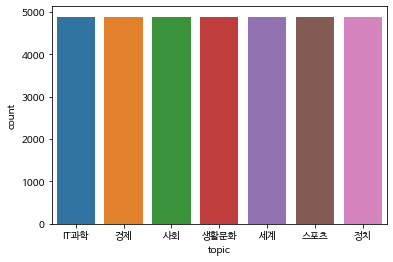

In [ ]:
# train2 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않는다.
# order value_counts 기준으로 정렬을 해준다.
sns.countplot(data=df, x='topic', order=df["topic"].value_counts().index)

In [ ]:
# apply, lambda를 통해 문자ㅡ 단어 빈도수 파생변수 만들기
# df["len"]
# df["word_count"]
# df["unique_word_count"]
df["len"] = df["title"].apply(lambda x: len(x))
df["word_count"] = df["title"].apply(lambda x: len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x: len(set(x.split())))
df

,topic_idx,title,topic,len,word_count,unique_word_count
0,0.0,Side-scrolling action platformer Fallen Knight...,IT과학,97,16,16
1,0.0,"Pokemon Go Deoxys Raid Guide: Best Counters, W...",IT과학,65,10,10
2,0.0,HMD Global preparing for the Initial Public Of...,IT과학,69,11,11
3,0.0,Perseid Meteor Shower: Peak Dates For Fireball...,IT과학,62,9,9
4,0.0,Street Fighter producer Yoshinori Ono quits Ca...,IT과학,50,7,7
...,...,...,...,...,...,...
34190,6.0,"Barbara Bush In 'Failing Health,' Won't Seek M...",정치,67,10,10
34191,6.0,Roy Moore Backers Say George Soros Is Paying W...,정치,67,13,13
34192,6.0,The Onion May Have Gotten Too Real For A Supre...,정치,62,12,12
34193,6.0,How Republicans Could Hike Taxes On The Poor,정치,44,8,8


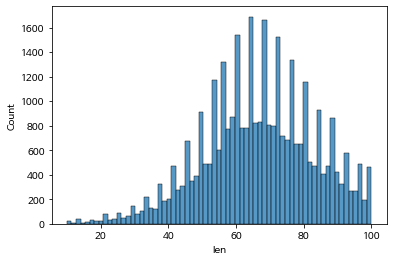

In [ ]:
# 서브플롯을 통해 "len", "word_count", "unique_word_count"의 histplot을 시각화 한다
sns.histplot(data=df, x="len")

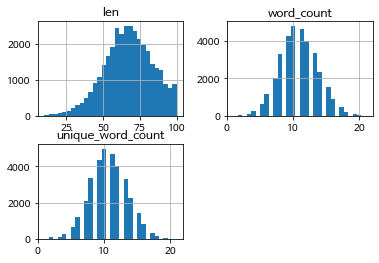

In [ ]:
# 확인해본 결과 특별히 눈에 띄는 값은 없다.
df[["len", "word_count", "unique_word_count"]].hist(bins=30)
plt.show()

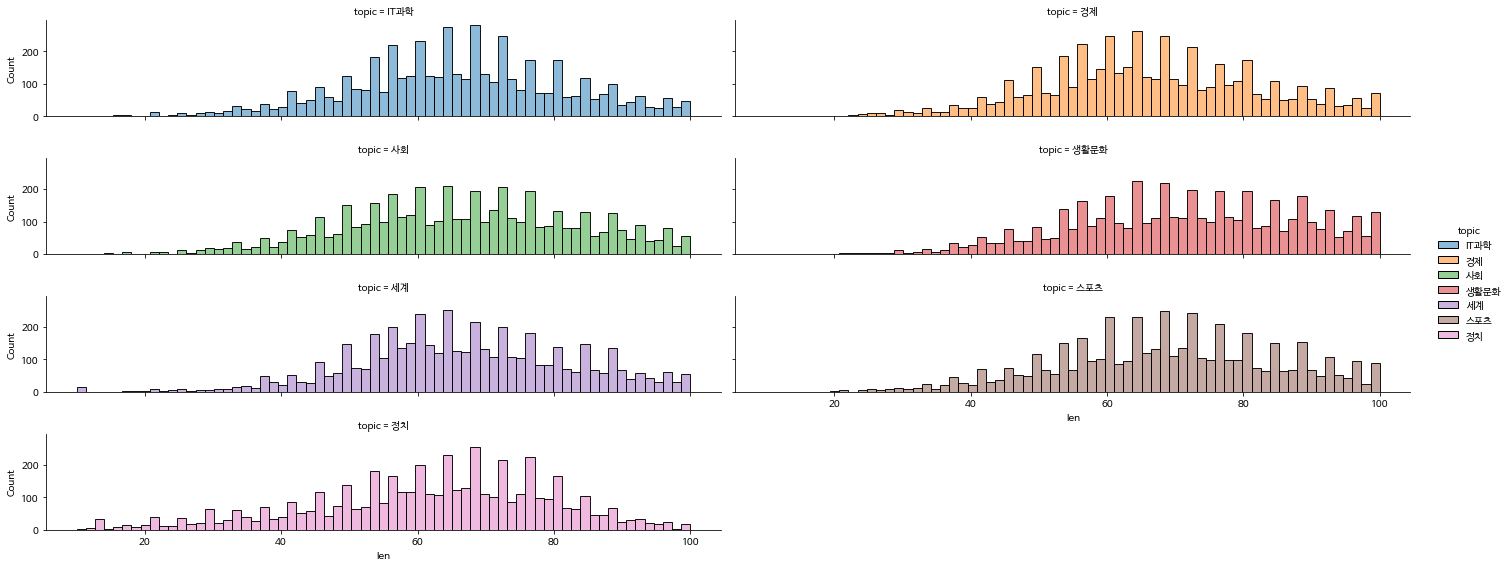

In [ ]:
# 문장길이
# displot 으로 topic 별 "len" 의 histplot 시각화 하기
# data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2
sns.displot(data=df, x="len",hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

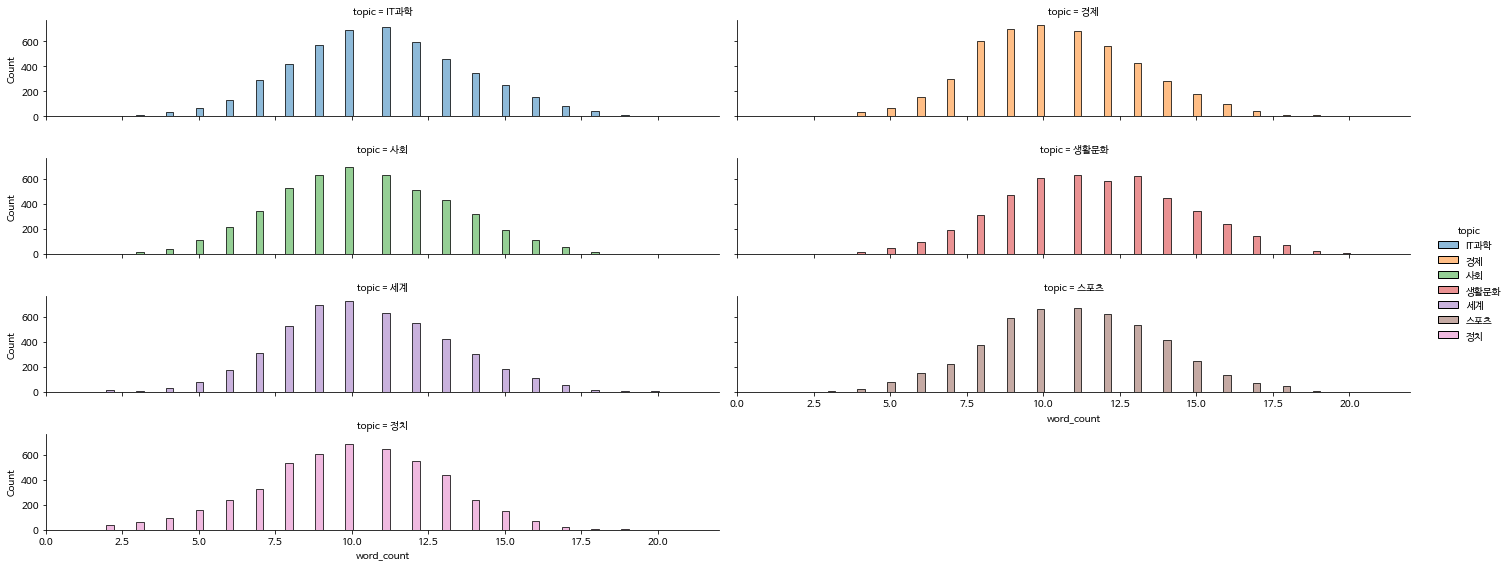

In [ ]:
# 단어 수
# displot 으로 topic 별 "word_count"의 histplot 시각화 하기
sns.displot(data=df, x="word_count",hue="topic",col="topic", col_wrap=2, height=2, aspect=5)

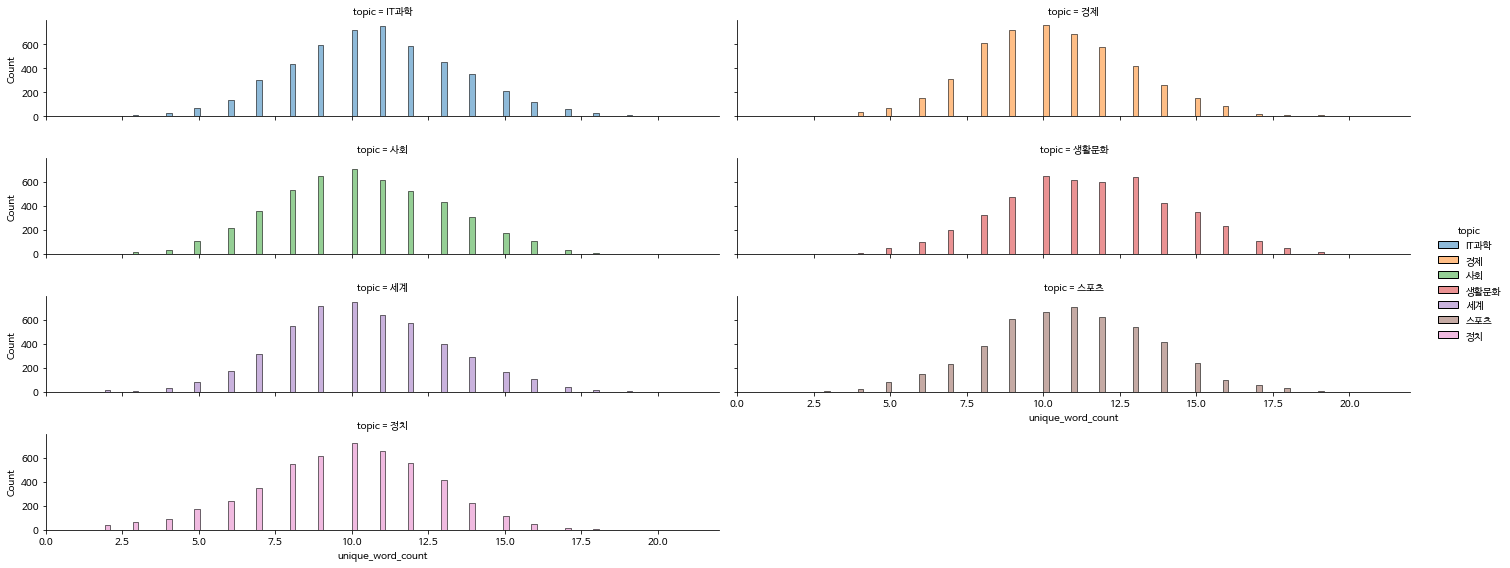

In [ ]:
# 중복 제거 단어 수
# displot 으로 topic 별 "unique_word_count" 의 histplot 시각화 하기
sns.displot(data=df, x="unique_word_count", hue="topic", col="topic", col_wrap=2, height=2, aspect=5)

In [ ]:
# join()을 이용하여 변수 title 리스트에서 문자열로 변환해 준다.
# content
content = " ".join(df["title"].tolist())
content[:100]

'Side-scrolling action platformer Fallen Knight coming to PS4, Xbox One, Switch, and PC in Q1 2021 Po'

In [ ]:
# topic의 unique 값만 보기
df["topic"].unique()

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [ ]:
# df.loc로 특정 토픽만 가져와서 join으로 문자열을 연결한다.
content = " ".join(df.loc[df["topic"] == "생활문화","title"].tolist())
content[:100]

'Gogglebox star Julie Malone shows off weight loss and reveals personal reason for new look UB40 sing'

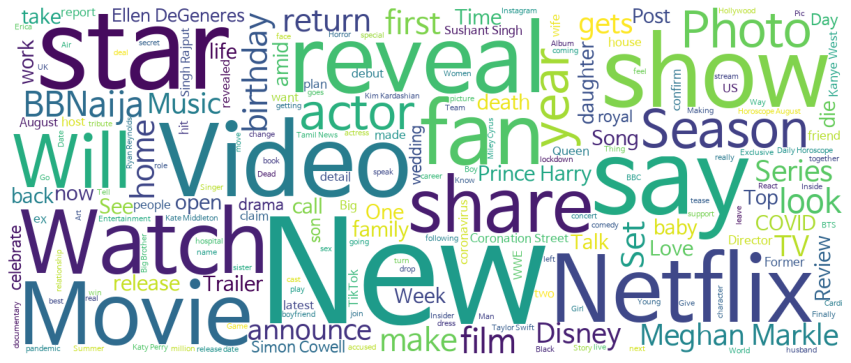

In [ ]:
# content를 위해서 만든 함수인 display_word_cloud로 워드클라우드를 시각화 한다.
display_word_cloud(content)